In [304]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [305]:
yelddf = pd.read_csv('./sentiment labelled sentences/yelp_labelled.txt', delimiter= '\t', header=None)
yelddf.head(1)

,0,1
0,Wow... Loved this place.,1


In [306]:
imdbdf = pd.read_csv('./sentiment labelled sentences/imdb_labelled.txt', delimiter= '\t', header=None)
imdbdf.head(1)

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0


In [307]:
amazondf = pd.read_csv('./sentiment labelled sentences/amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazondf.head(1)

,0,1
0,So there is no way for me to plug it in here i...,0


In [308]:
frame=[yelddf,imdbdf]#,amazondf]

df = pd.concat(frame)
df.columns = ['content', 'spam']

In [309]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.content.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [310]:
df['allcaps'] = df.content.str.islower()

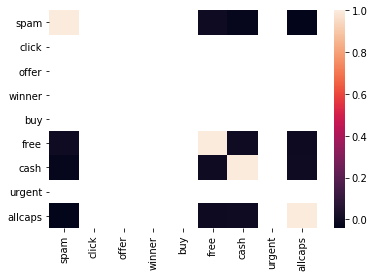

In [311]:
sns.heatmap(df.corr())
plt.show()

In [312]:
data = df[keywords + ['allcaps']]
target = df['spam']

In [313]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)
mis_label = (target != y_pred).sum()
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1748 points : 851


In [317]:
df_confusion = pd.crosstab(target, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
FP = df_confusion.loc[df_confusion.index == False, True].iloc[0]
TN = df_confusion.loc[df_confusion.index == False, False].iloc[0]
TP = df_confusion.loc[df_confusion.index == True, True].iloc[0]
FN = df_confusion.loc[df_confusion.index == True, False].iloc[0]

print(df_confusion)

print('\n')
print('{}({:,.2f}%) of our {} errors are False Positive.'.format(FP,(FP/mis_label)*100,mis_label))
print('{}({:,.2f}%) of our {} errors are False Negative.'.format(FN,(FN/mis_label)*100,mis_label))
print('\n')

Predicted   0     1   All
Actual                   
0          26   836   862
1          15   871   886
All        41  1707  1748


836(98.24%) of our 851 errors are False Positive.
15(1.76%) of our 851 errors are False Negative.




In [315]:
NBTTA_Accuracy = (TN+TP)/(FP+TN+TP+FN)
print('Accuracy: {:,.2f}'.format(NBTTA_Accuracy))
NBTTA_Precision = TP/(TP+FP)
print('Precision: {:,.2f}'.format(NBTTA_Precision))
NBTTA_Recall = TP/(TP+FN)
print('Recall: {:,.2f}'.format(NBTTA_Recall))
NBTTA_F1 = 2*(NBTTA_Recall * NBTTA_Precision) / (NBTTA_Recall + NBTTA_Precision)
print('F1 Score: {:,.2f}'.format(NBTTA_F1))

Accuracy: 0.51
Precision: 0.51
Recall: 0.98
F1 Score: 0.67


In [280]:
## Load Spam word
spamdf = pd.read_csv('./sentiment labelled sentences/spamword.csv',header=None)

spamlist=spamdf.reset_index().values.tolist()
spamlist[0,1]

TypeError: list indices must be integers or slices, not tuple

In [238]:
specialchar=['\\',',','/',':',';',"'",'"','.','-','_','+','&','$','%','@','!','(',')']

for i in specialchar:
    df['content'] = df['content'].str.replace(i,'')
df.head(1)




,content,spam
0,Wow Loved this place,1


In [ ]:
#Set feature and target
y = df['spam']
X = df.drop('spam', axis=1)

In [247]:
for key in spamdf:
    print(key)
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.content.str.contains(' ' + str(key) + ' ',case=False)
    print(df[str(key)])   
    

spam
0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
718    False
719    False
720    False
721    False
722    False
723    False
724    False
725    False
726    False
727    False
728    False
729    False
730    False
731    False
732    False
733    False
734    False
735    False
736    False
737    False
738    False
739    False
740    False
741    False
742    False
743    False
744    False
745    False
746    False
747    False
Name: spam, Length: 1748, dtype: bool


In [242]:
df.describe()

,content,spam
count,1748,1748
unique,1740,1
top,I love this place,False
freq,2,1748


In [91]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

In [195]:
trainIndex, testIndex = list(), list()
for i in range(df.shape[0]):
    if np.random.uniform(0, 1) < 0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = df.loc[trainIndex]
testData = df.loc[testIndex]
trainData.head(2)

/home/ll/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/home/ll/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


,content,spam
0,Wow Loved this place,1.0
0,A very very very slowmoving aimless movie abou...,0.0


In [196]:
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,content,spam
0,Wow Loved this place,1.0
1,A very very very slowmoving aimless movie abou...,0.0
2,Not tasty and the texture was just nasty,0.0
3,Attempting artiness with black white and clev...,0.0
4,Stopped by during the late May bank holiday of...,1.0


In [197]:
testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,content,spam
0,Crust is not good,0.0
1,Not sure who was more lost the flat character...,0.0
2,A great touch,1.0
3,Loved the casting of Jimmy Buffet as the scien...,1.0
4,Service was very prompt,1.0


In [212]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 2 columns):
content    411 non-null object
spam       411 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.7+ KB


In [237]:
def testaccuracy(target, data):
    # Our data is binary / boolean, so we're importing the Bernoulli classifier.
    from sklearn.naive_bayes import BernoulliNB

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(data, target)

    pred = bnb.predict(data)

    print('Out of {} predictions, {} were misclassified'.format(data.shape[0], (pred != target).sum()))
    accuracy = (data.shape[0]-(pred != target).sum())/data.shape[0]
    print('Thats a {0:.2} accuracy'.format(accuracy))

In [166]:
Word = pd.Series(' '.join(df['Content']).lower().split()).value_counts()[:]
Word.head(1)

the    1427
dtype: int64

In [167]:
SpamWord = pd.Series(' '.join(spamdf['Content']).lower().split()).value_counts()[:]

In [100]:
df.head(2) # stop word

,Content,Spam
0,Wow Loved this place,1
1,Crust is not good,0


In [165]:
spamdf=df[df['Spam']==1]
spamdf.head(4)

,Content,Spam
0,Wow Loved this place,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too,1


In [217]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        #message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

IndentationError: expected an indented block (<ipython-input-217-6a8cbb5ecc64>, line 4)

In [218]:
class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.mails, self.labels = df['content'], df['spam']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result
    



In [215]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [220]:
sc_tf_idf = SpamClassifier(trainData,'tf-idf')
sc_tf_idf.train()

preds_tf_idf = sc_tf_idf.predict(testData['Content'])
metrics(testData['Spam'], preds_tf_idf)

AttributeError: 'Series' object has no attribute 'lower'

In [205]:
import nltk
from nltk.corpus import stopwords
#nltk.download()



In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
stop_words = set(stopwords.words('english'))

In [16]:
for i in df['Content']:
    word_tokens = word_tokenize(i)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(word_tokens)
print(filtered_sentence)
#http://www.geeksforgeeks.org/removing-stop-words-nltk-python/

['You', 'can', 'not', 'answer', 'calls', 'with', 'the', 'unit', 'never', 'worked', 'once']
['You', 'answer', 'calls', 'unit', 'never', 'worked']


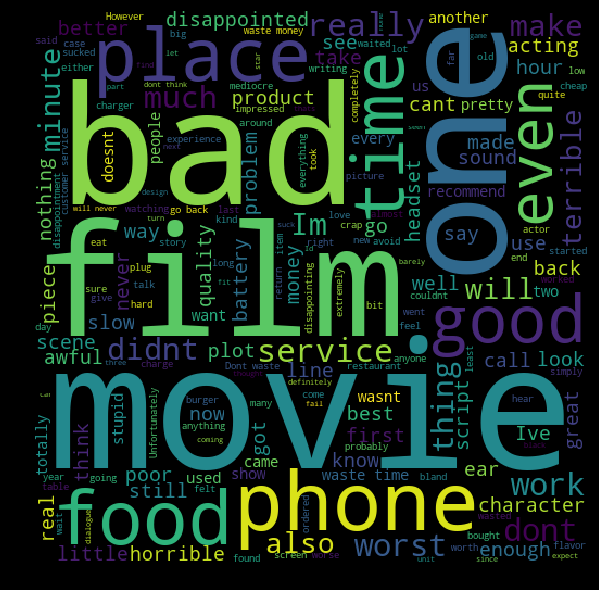

In [49]:
spam_words= ' '.join(list(df[df['Spam']==0]['Content']))
spam_wc = WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

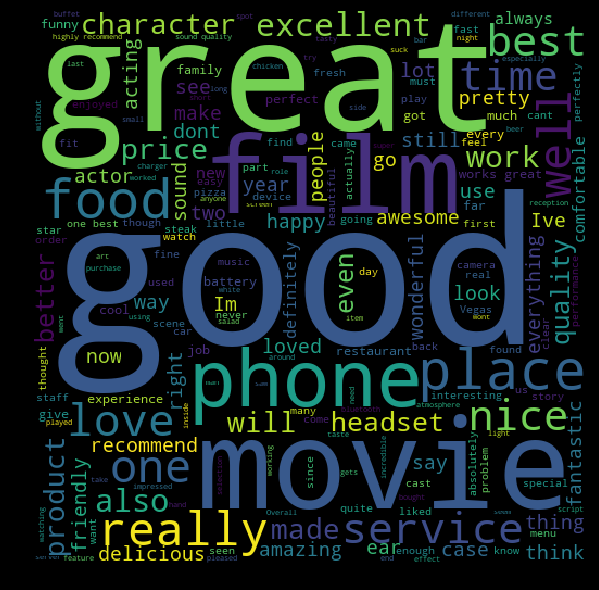

In [92]:
from wordcloud import WordCloud
spam_words= ' '.join(list(df[df['Spam']==1]['Content']))
spam_wc = WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()